In [28]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR


In [29]:
weather01 = pd.read_csv('IndianWeatherRepository 1.csv')

In [30]:
columns_to_drop =['air_quality_gb-defra-index','country','latitude','longitude','air_quality_us-epa-index','timezone','condition_text','air_quality_Sulphur_dioxide','air_quality_PM2.5','last_updated_epoch','moon_phase','moon_illumination','wind_mph','wind_degree','wind_direction','pressure_mb','precip_in','feels_like_fahrenheit','visibility_miles','uv_index','gust_mph','gust_kph','temperature_fahrenheit','cloud','visibility_km','air_quality_PM10','sunrise','sunset','moonrise','moonset','air_quality_Ozone','air_quality_Carbon_Monoxide']
weather01 = weather01.drop(columns_to_drop, axis=1)
weather01.head()
weather01


,location_name,region,last_updated,temperature_celsius,wind_kph,pressure_in,precip_mm,humidity,feels_like_celsius,air_quality_Nitrogen_dioxide
0,Ashoknagar,Madhya Pradesh,2023-08-29 10:45,27.5,20.5,29.77,0.0,67,29.7,1.7
1,Raisen,Madhya Pradesh,2023-08-29 10:45,27.5,15.5,29.78,0.0,70,30.0,2.1
2,Chhindwara,Madhya Pradesh,2023-08-29 10:45,26.3,18.4,29.78,0.0,70,28.2,0.6
3,Betul,Madhya Pradesh,2023-08-29 10:45,25.6,16.9,29.80,0.0,76,27.6,1.2
4,Hoshangabad,Madhya Pradesh,2023-08-29 10:45,27.2,16.2,29.79,0.0,74,29.9,2.2
...,...,...,...,...,...,...,...,...,...,...
109531,Niwari,Uttar Pradesh,2024-03-19 22:00,25.0,6.1,29.94,0.0,39,23.8,32.9
109532,Saitual,Mizoram,2024-03-19 22:00,20.6,3.6,29.92,0.0,34,20.7,4.8
109533,Ranipet,Tamil Nadu,2024-03-19 22:00,23.8,11.5,29.91,0.0,72,25.6,7.1
109534,Tenkasi,Tamil Nadu,2024-03-19 22:00,30.0,9.0,29.88,0.0,62,37.7,4.2


In [31]:
first_row = weather01.iloc[0]
print(first_row)

location_name                         Ashoknagar
region                            Madhya Pradesh
last_updated                    2023-08-29 10:45
temperature_celsius                         27.5
wind_kph                                    20.5
pressure_in                                29.77
precip_mm                                    0.0
humidity                                      67
feels_like_celsius                          29.7
air_quality_Nitrogen_dioxide                 1.7
Name: 0, dtype: object


In [32]:
#renaming our columns
weather01 = weather01.rename(columns={'location_name':'location','last_updated':'date','condition_text':'cloud_cover'})
weather01.shape

(109536, 10)

In [33]:
# Converting 'date' column to datetime format
weather01['date_time'] = pd.to_datetime(weather01['date'], format='%Y-%m-%d %H:%M')
weather01.head()


,location,region,date,temperature_celsius,wind_kph,pressure_in,precip_mm,humidity,feels_like_celsius,air_quality_Nitrogen_dioxide,date_time
0,Ashoknagar,Madhya Pradesh,2023-08-29 10:45,27.5,20.5,29.77,0.0,67,29.7,1.7,2023-08-29 10:45:00
1,Raisen,Madhya Pradesh,2023-08-29 10:45,27.5,15.5,29.78,0.0,70,30.0,2.1,2023-08-29 10:45:00
2,Chhindwara,Madhya Pradesh,2023-08-29 10:45,26.3,18.4,29.78,0.0,70,28.2,0.6,2023-08-29 10:45:00
3,Betul,Madhya Pradesh,2023-08-29 10:45,25.6,16.9,29.80,0.0,76,27.6,1.2,2023-08-29 10:45:00
4,Hoshangabad,Madhya Pradesh,2023-08-29 10:45,27.2,16.2,29.79,0.0,74,29.9,2.2,2023-08-29 10:45:00


In [34]:
#Now we will calculate Temporal aggregation which we will use further 
# Calculate daily average temperature, humidity, and total precipitation
daily_aggregated_data = weather01.resample('D', on='date_time').agg({
    'temperature_celsius': 'mean',
    'humidity': 'mean',
    'precip_mm': 'sum'
})

print("Daily Aggregated Data:")
print(daily_aggregated_data.head())

Daily Aggregated Data:
            temperature_celsius   humidity  precip_mm
date_time                                            
2023-08-29            29.666667  59.926335       27.1
2023-08-30            28.246909  65.676364       26.2
2023-08-31            24.940182  76.690909      122.4
2023-09-01            25.379779  76.154412      206.0
2023-09-02            25.628780  75.327869      268.4


In [35]:
weather01=weather01.drop('date',axis=1)


In [36]:
grouped_data = weather01.groupby(['location'])

derived_group_name = None

city_name= input('enter city name:')

derived_group_name = city_name
City = grouped_data.get_group(derived_group_name)
City

,location,region,temperature_celsius,wind_kph,pressure_in,precip_mm,humidity,feels_like_celsius,air_quality_Nitrogen_dioxide,date_time
355,Pune,Maharashtra,26.4,15.8,29.84,0.0,64,27.9,3.4,2023-08-29 10:45:00
900,Pune,Maharashtra,25.3,8.3,29.88,0.0,67,26.8,5.7,2023-08-30 09:00:00
1449,Pune,Maharashtra,21.1,6.8,29.84,0.0,93,21.1,6.3,2023-08-31 05:30:00
1998,Pune,Maharashtra,23.4,8.3,29.81,0.0,79,25.4,16.3,2023-09-01 05:15:00
2542,Pune,Maharashtra,24.8,5.8,29.79,0.0,76,26.7,11.5,2023-09-02 05:15:00
...,...,...,...,...,...,...,...,...,...,...
107146,Pune,Maharashtra,24.0,7.6,29.95,0.0,36,24.6,32.9,2024-03-15 22:15:00
107694,Pune,Maharashtra,24.6,11.5,29.95,0.0,37,24.9,17.7,2024-03-16 22:00:00
108246,Pune,Maharashtra,24.0,15.1,29.95,0.0,36,24.6,14.4,2024-03-17 22:15:00
108797,Pune,Maharashtra,24.6,10.4,29.94,0.0,35,24.8,19.4,2024-03-18 22:15:00


In [37]:
import plotly.express as px
fig = px.line(City, x='date_time', y='temperature_celsius')
fig.show()


c:\Users\shree\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [38]:
City = City.set_index('date_time')
City.describe()

,temperature_celsius,wind_kph,pressure_in,precip_mm,humidity,feels_like_celsius,air_quality_Nitrogen_dioxide
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,21.683500,6.89350,29.909300,0.023850,58.460000,22.255500,32.528000
std,2.029946,2.92171,0.085898,0.145825,21.554615,2.504703,19.656398
min,16.300000,3.60000,29.690000,0.000000,16.000000,16.300000,1.800000
25%,20.275000,4.30000,29.880000,0.000000,40.000000,20.275000,18.300000
50%,21.550000,6.50000,29.930000,0.000000,55.000000,21.550000,31.900000
75%,23.000000,8.60000,29.960000,0.000000,74.250000,24.700000,43.500000
max,28.300000,15.80000,30.070000,1.510000,96.000000,27.900000,111.000000


In [39]:
# Now we will perform 'Moving Averages' for short term fluctuation in the dataset
# Calculate 7-day moving average of temperature
City['temperature_7day_ma'] = City['temperature_celsius'].rolling(window=7).mean()
City['humidity_7day_ma'] = City['humidity'].rolling(window=7).mean()
City['wind_speed_7day_ma'] = City['wind_kph'].rolling(window=7).mean()
print("weather01 Data with Moving Averages:")
print(City[[ 'temperature_celsius', 'temperature_7day_ma','humidity','humidity_7day_ma','wind_kph','wind_speed_7day_ma']])
#Remember these are new columns in our dataset

weather01 Data with Moving Averages:
                     temperature_celsius  temperature_7day_ma  humidity  \
date_time                                                                 
2023-08-29 10:45:00                 26.4                  NaN        64   
2023-08-30 09:00:00                 25.3                  NaN        67   
2023-08-31 05:30:00                 21.1                  NaN        93   
2023-09-01 05:15:00                 23.4                  NaN        79   
2023-09-02 05:15:00                 24.8                  NaN        76   
...                                  ...                  ...       ...   
2024-03-15 22:15:00                 24.0            25.242857        36   
2024-03-16 22:00:00                 24.6            25.114286        37   
2024-03-17 22:15:00                 24.0            24.957143        36   
2024-03-18 22:15:00                 24.6            24.671429        35   
2024-03-19 22:00:00                 24.8            24.428571  

In [40]:
#  SVM model training 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

City.dropna(inplace=True)



c:\Users\shree\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\shree\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='date_time', ylabel='temperature_celsius'>

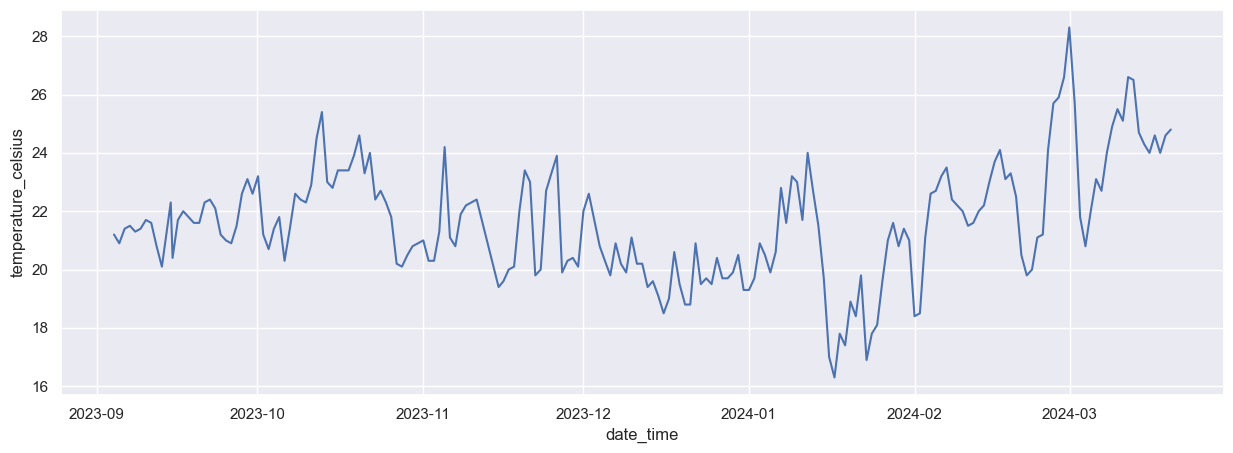

In [41]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(x = 'date_time', y= 'temperature_celsius', data= City)

In [42]:
# selecting the independent feature i.e., features in which the ML model will be trained 
independent_feature= ['wind_kph','pressure_in','precip_mm','humidity','air_quality_Nitrogen_dioxide','feels_like_celsius'] 
# selecting the targeted feature i.e., features that will be predicted based on their respective value in independent feature
targeted_feature= ['temperature_celsius']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(City[independent_feature],City[targeted_feature],test_size=0.3,random_state=3)
X_train.shape, X_test.shape

((135, 6), (59, 6))

In [44]:
# creating the svr model with approprieate hyperparameter tuning techniques
svr=SVR(kernel='linear',C = 100, epsilon=1)
# training the model
svr.fit(X_train, y_train)


c:\Users\shree\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=100, epsilon=1, kernel='linear')

In [45]:

new_data = np.array([[5.0,30.02,0.0,38,12.4,24]]) 

# Predict the temperature for the new data
predicted_temperature = svr.predict(new_data)

# Print the predicted temperature
print(f"Predicted temperature: {predicted_temperature[0]:.4f} degrees Celsius")


Predicted temperature: 23.6092 degrees Celsius


c:\Users\shree\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names



In [46]:
X_test

,wind_kph,pressure_in,precip_mm,humidity,air_quality_Nitrogen_dioxide,feels_like_celsius
date_time,,,,,,
2023-10-08 02:45:00,3.6,29.85,0.01,83,18.5,24.8
2023-09-29 04:15:00,7.9,29.70,0.00,90,38.7,25.3
2023-09-18 04:15:00,9.0,29.69,0.01,92,6.9,21.8
2023-11-29 01:15:00,3.6,29.86,0.00,87,48.0,20.4
2023-12-27 00:45:00,3.6,30.00,0.00,42,75.4,19.7
2024-01-25 23:00:00,4.7,30.02,0.00,32,55.5,19.6
2024-01-26 23:30:00,4.0,30.07,0.00,39,68.6,21.0
2023-11-20 01:30:00,5.0,29.92,0.00,58,33.2,25.1
2023-09-16 04:15:00,13.3,29.73,0.00,91,4.2,21.7


In [47]:
y_pred = svr.predict(X_test)
y_pred=pd.DataFrame(y_pred)

y_pred.columns = ['Predicted Value'] 

In [48]:
import pandas as pd


df1 = pd.DataFrame(y_test)
df2 = pd.DataFrame(y_pred)

df1.index = y_test.index  
df2.index = df1.index  



difference = pd.DataFrame({'difference': df1.iloc[:, 0] - df2.iloc[:, 0]})

merged_df = pd.concat([df1, df2, difference], axis=1)
merged_df

,temperature_celsius,Predicted Value,difference
date_time,,,
2023-10-08 02:45:00,22.6,23.155978,-0.555978
2023-09-29 04:15:00,23.1,23.508413,-0.408413
2023-09-18 04:15:00,21.8,20.948353,0.851647
2023-11-29 01:15:00,20.4,19.241773,1.158227
2023-12-27 00:45:00,19.7,19.515788,0.184212
2024-01-25 23:00:00,19.6,19.879704,-0.279704
2024-01-26 23:30:00,21.0,20.597360,0.402640
2023-11-20 01:30:00,23.4,23.903318,-0.503318
2023-09-16 04:15:00,21.7,20.934953,0.765047


In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(y_test,y_pred)

0.8691641515454339

In [51]:
from sklearn.metrics import mean_squared_error

def mse(y_test, y_pred):
  return mean_squared_error(y_test, y_pred)
mse(y_test,y_pred)


0.4995163102878743

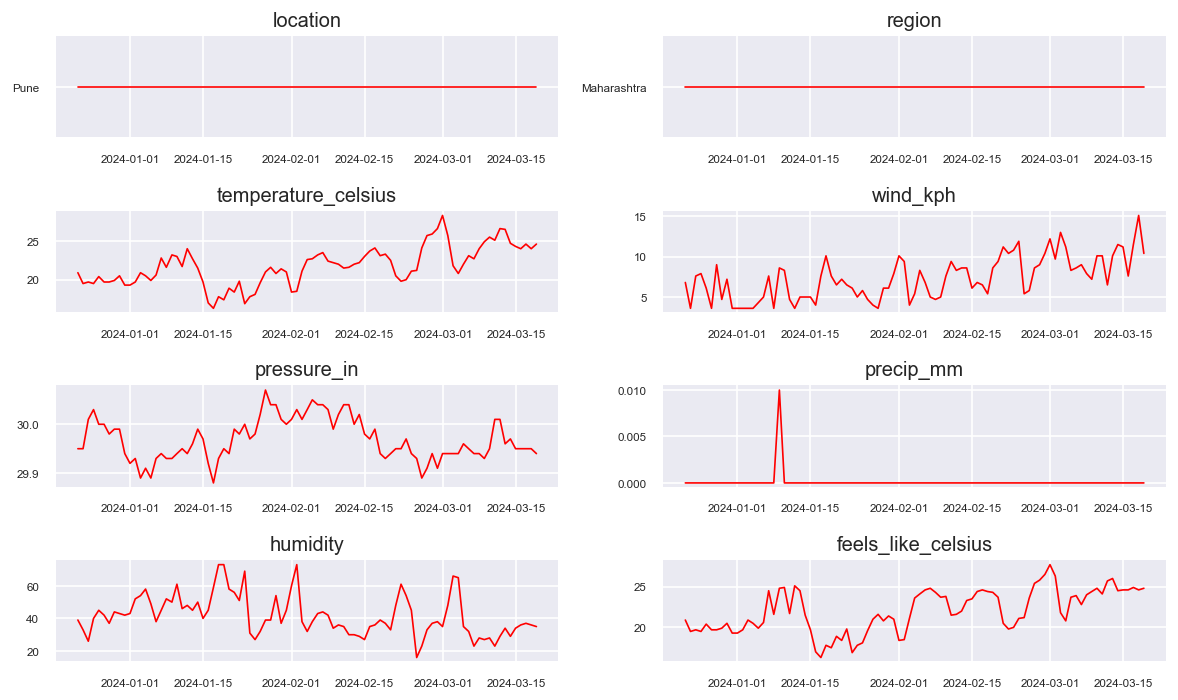

In [52]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = City[City.columns[i]]['2023-12-22 00:15:00':'2024-03-19 21:45:00']
    ax.plot(data, color='red', linewidth=1)

    ax.set_title(City.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=7)
plt.tight_layout()


In [53]:
import pickle
with open('model.pkl','wb') as files:
    pickle.dump(svr, files)
